<a href="https://colab.research.google.com/github/rivervaladao/Java/blob/master/Medical_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Custos Médicos Individuais para Seguro de Saúde
Este notebook é implementação do TechChallenge POSTECH FIAP em IA para Devs, usando técnicas de Machine Learning com a linguagem Python, pra criar um modelo.

## Importando Bibliotecas e Dataset
Vamos começar importando as bibliotecas necessárias e carregando o dataset utilizado é baseado [nesse aqui](https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction) - foram os valores categóricos foram traduzidos para português

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("dados_saude.csv")
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,feminino,27.900,0,sim,sudoeste,16884.92400
1,18,masculino,33.770,1,não,sudeste,1725.55230
2,28,masculino,33.000,3,não,sudeste,4449.46200
3,33,masculino,22.705,0,não,noroeste,21984.47061
4,32,masculino,28.880,0,não,noroeste,3866.85520


Os dados carregados contêm as seguintes colunas:

1. **idade**: Idade da pessoa.
2. **gênero**: Gênero da pessoa.
3. **imc**: Índice de Massa Corporal (IMC).
4. **filhos**: Número de filhos.
5. **fumante**: Se a pessoa é fumante ou não.
6. **região**: Região onde a pessoa reside.
7. **encargos**: Encargos de saúde associados.


In [ ]:
df.shape

(1338, 7)

Podemos observar que o conjunto de dados contém 6 features independentes e 1 variável target "encargos"

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   gênero    1338 non-null   object 
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   object 
 5   região    1338 non-null   object 
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos ver que o dataset contém 2 colunas com tipo float e 3 categóricas e o restante do tipo inteiro

In [ ]:
df.describe()

,idade,imc,filhos,encargos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1.   Idade : A idade média dos segurados é de aproximadamente 39 anos, com um desvio padrão de 14 anos, indicando uma distribuição de idades relativamente ampla. A idade mínima é de 18 anos e a máxima é de 64 anos, o que sugere que o conjunto de dados cobre adultos em uma ampla faixa de fases da vida adulta.

2.   Índice de Massa Corporal : O IMC médio é aproximadamente 30.66, que é considerado como sobrepeso. O desvio padrão de cerca de 6 indica variação moderada no IMC entre os segurados. O valor mínimo de IMC é de 15.96, que é considerado muito abaixo do normal, enquanto o máximo é de 53.13, que é considerado obeso.

3.   Filhos : Em média, os segurados têm cerca de 1 filho, com um desvio padrão de 1.2, sugerindo que muitos segurados têm um ou dois filhos, mas também há segurados sem filhos ou com mais filhos.

4.   Encargos : Os custos médios do seguro são de aproximadamente 13270.42. Há uma variação significativa nos custos, como indicado pelo alto desvio padrão de 12110.01. O custo mínimo é de 1121.87, o que pode representar planos básicos ou individuos com baixo risco, e o custo máximo é de 63770.43, o que pode indicar tratamentos ou condições de saúde mais caros.

5. Os percentis (25%, 50%, 75%) oferecem uma visão da distribuição dos dados. Por exemplo, 50% dos segurados têm uma idade de 39 anos ou menos e um IMC de 30.4 ou menos. O 50% percentil, ou mediana, é particularmente útil para entender a distribuição dos dados, pois não é tão influenciado por valores extremos quanto a média.

In [ ]:
#validando se há entradas nullas
df.isnull().sum()

,0
idade,0
gênero,0
imc,0
filhos,0
fumante,0
região,0
encargos,0


não há valores nullos nesse dataset

###Removendo duplicados

In [ ]:
df.drop_duplicates(inplace=True)

## Análise Exploratória de Dados
Agora, vamos explorar o conjunto de dados para entender suas características básicas. Faremos uma análise através de visualizações das frequências, distribuições, e correlações

### Gráficos de Distribuição para Variáveis Categóricas
Vamos visualizar a distribuição de algumas variáveis categóricas.

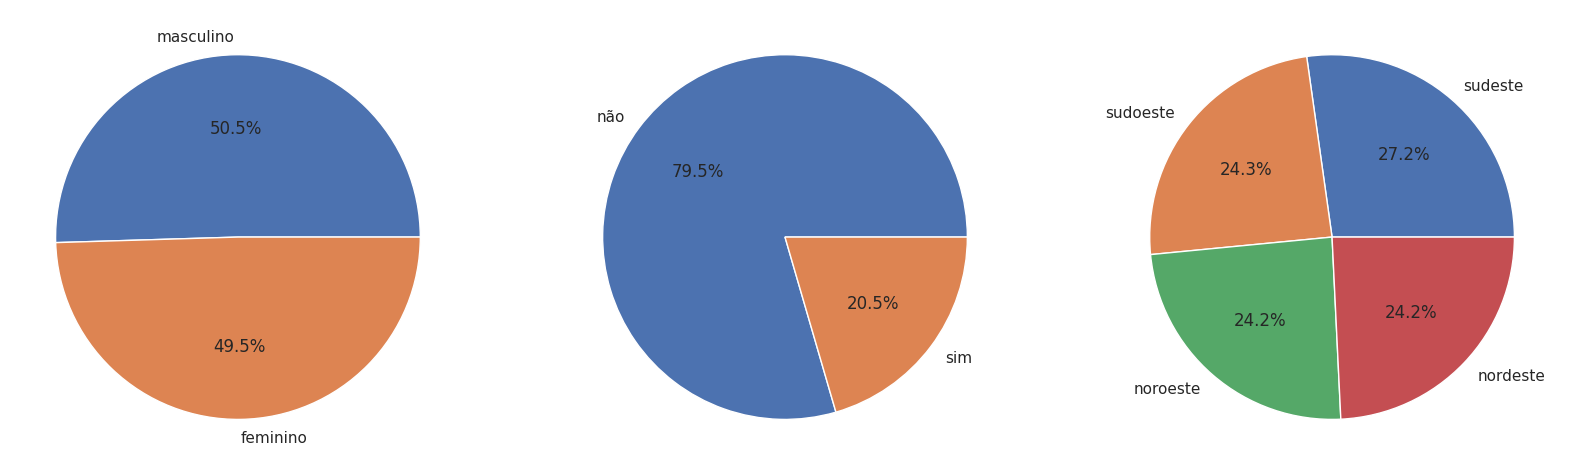

In [ ]:
colunas = ['gênero', 'fumante', 'região']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(colunas):
    plt.subplot(1, 3, i + 1)
    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.show()

1. Os percentuais entre gêneros são bastante próximas, sugerindo uma distribuição quase igual entre os sexos no contexto dos dados apresentados.

2. Proporção de Fumantes: o pedeçao correspondente aos fumantes (indicada por "sim") mostra que 20,5% das pessoas no conjunto de dados são fumantes. Isso é relevante porque ser fumante é frequentemente associado a riscos maiores de saúde e, consequentemente, a encargos de seguro mais elevados. Essa minoria de fumantes pode impactar significativamente os custos do seguro saúde.

3. Proporção de Não Fumantes: Por outro lado, uma grande maioria de 79,5% das pessoas são não fumantes (indicada por "não"). Isso sugere que a maior parte da população analisada pode ter um risco menor de saúde relacionado ao tabagismo, o que pode ser refletido em custos de seguro mais baixos para esse grupo.

4. Implicações para Previsão de Seguro: O status de fumante é um indicador importante na previsão de seguros de saúde devido à correlação direta com condições de saúde e custos médicos. Com uma diferença tão significativa entre fumantes e não fumantes, é provável que os modelos de previsão considerem o tabagismo como uma variável significativa na determinação dos preços dos seguros.

5. Distribuição por Região: Há uma distribuição relativamente equilibrada entre as regiões noroeste, nordeste e sudoeste. No entanto, a região sudeste tem a maior quantidade de pessoas.

6. Implicações para o Seguro Saúde: A localização geográfica pode influenciar as taxas de seguro saúde devido a fatores como o custo de vida, disponibilidade de serviços de saúde, prevalência de certas doenças e estilos de vida regionais. Um maior número de segurados em uma região pode indicar uma maior demanda por serviços de saúde.

### Comparação de Preços entre Diferentes Grupos
Análise das distribuições.

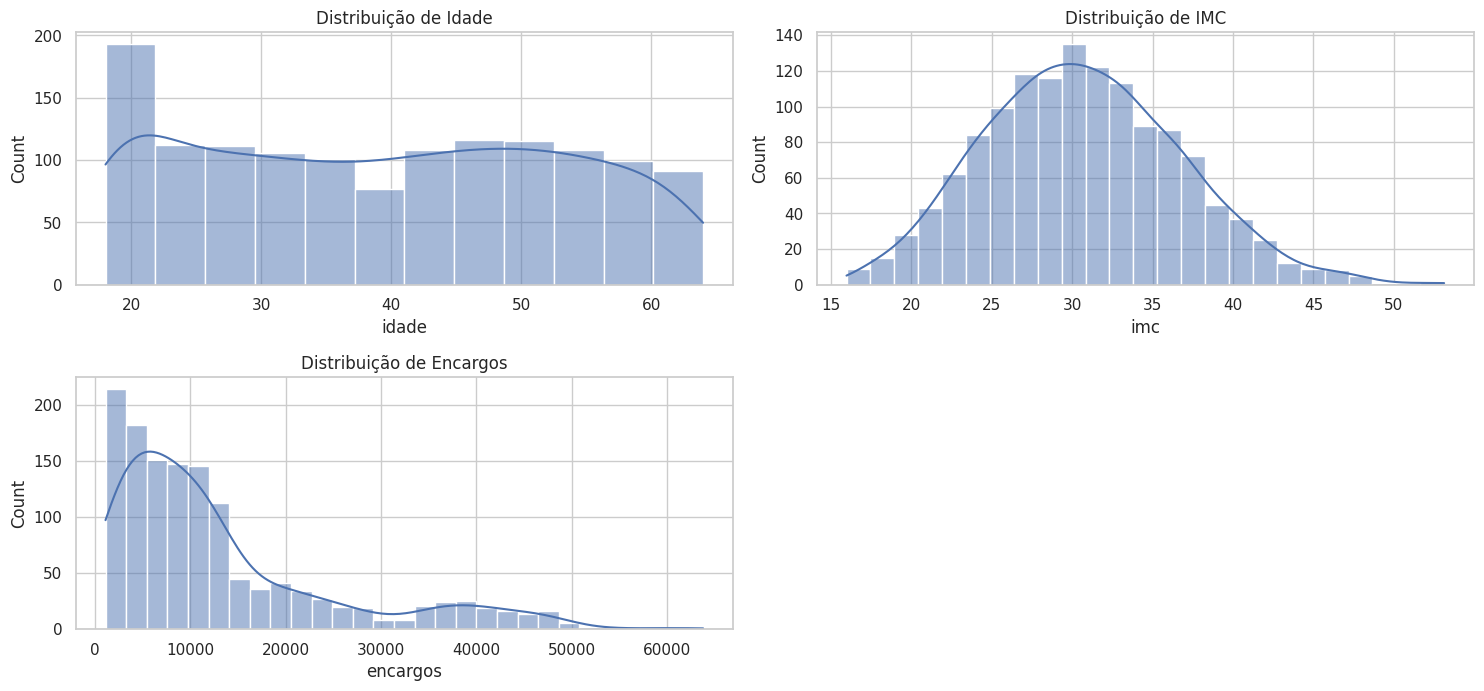

In [ ]:
# Gerando gráficos de análise exploratória das categorias

plt.figure(figsize=(15, 10))

# Gráfico de distribuição da idade
plt.subplot(3, 2, 1)
sns.histplot(df['idade'], kde=True)
plt.title('Distribuição de Idade')

# Gráfico de distribuição do IMC
plt.subplot(3, 2, 2)
sns.histplot(df['imc'], kde=True)
plt.title('Distribuição de IMC')

# Gráfico de distribuição do Encargos
plt.subplot(3, 2, 3)
sns.histplot(df['encargos'], kde=True)
plt.title('Distribuição de Encargos')

plt.tight_layout()
plt.show()


Vamos comparar os preços do seguro entre diferentes grupos categorizados por sexo, número de filhos, fumante, e região.c

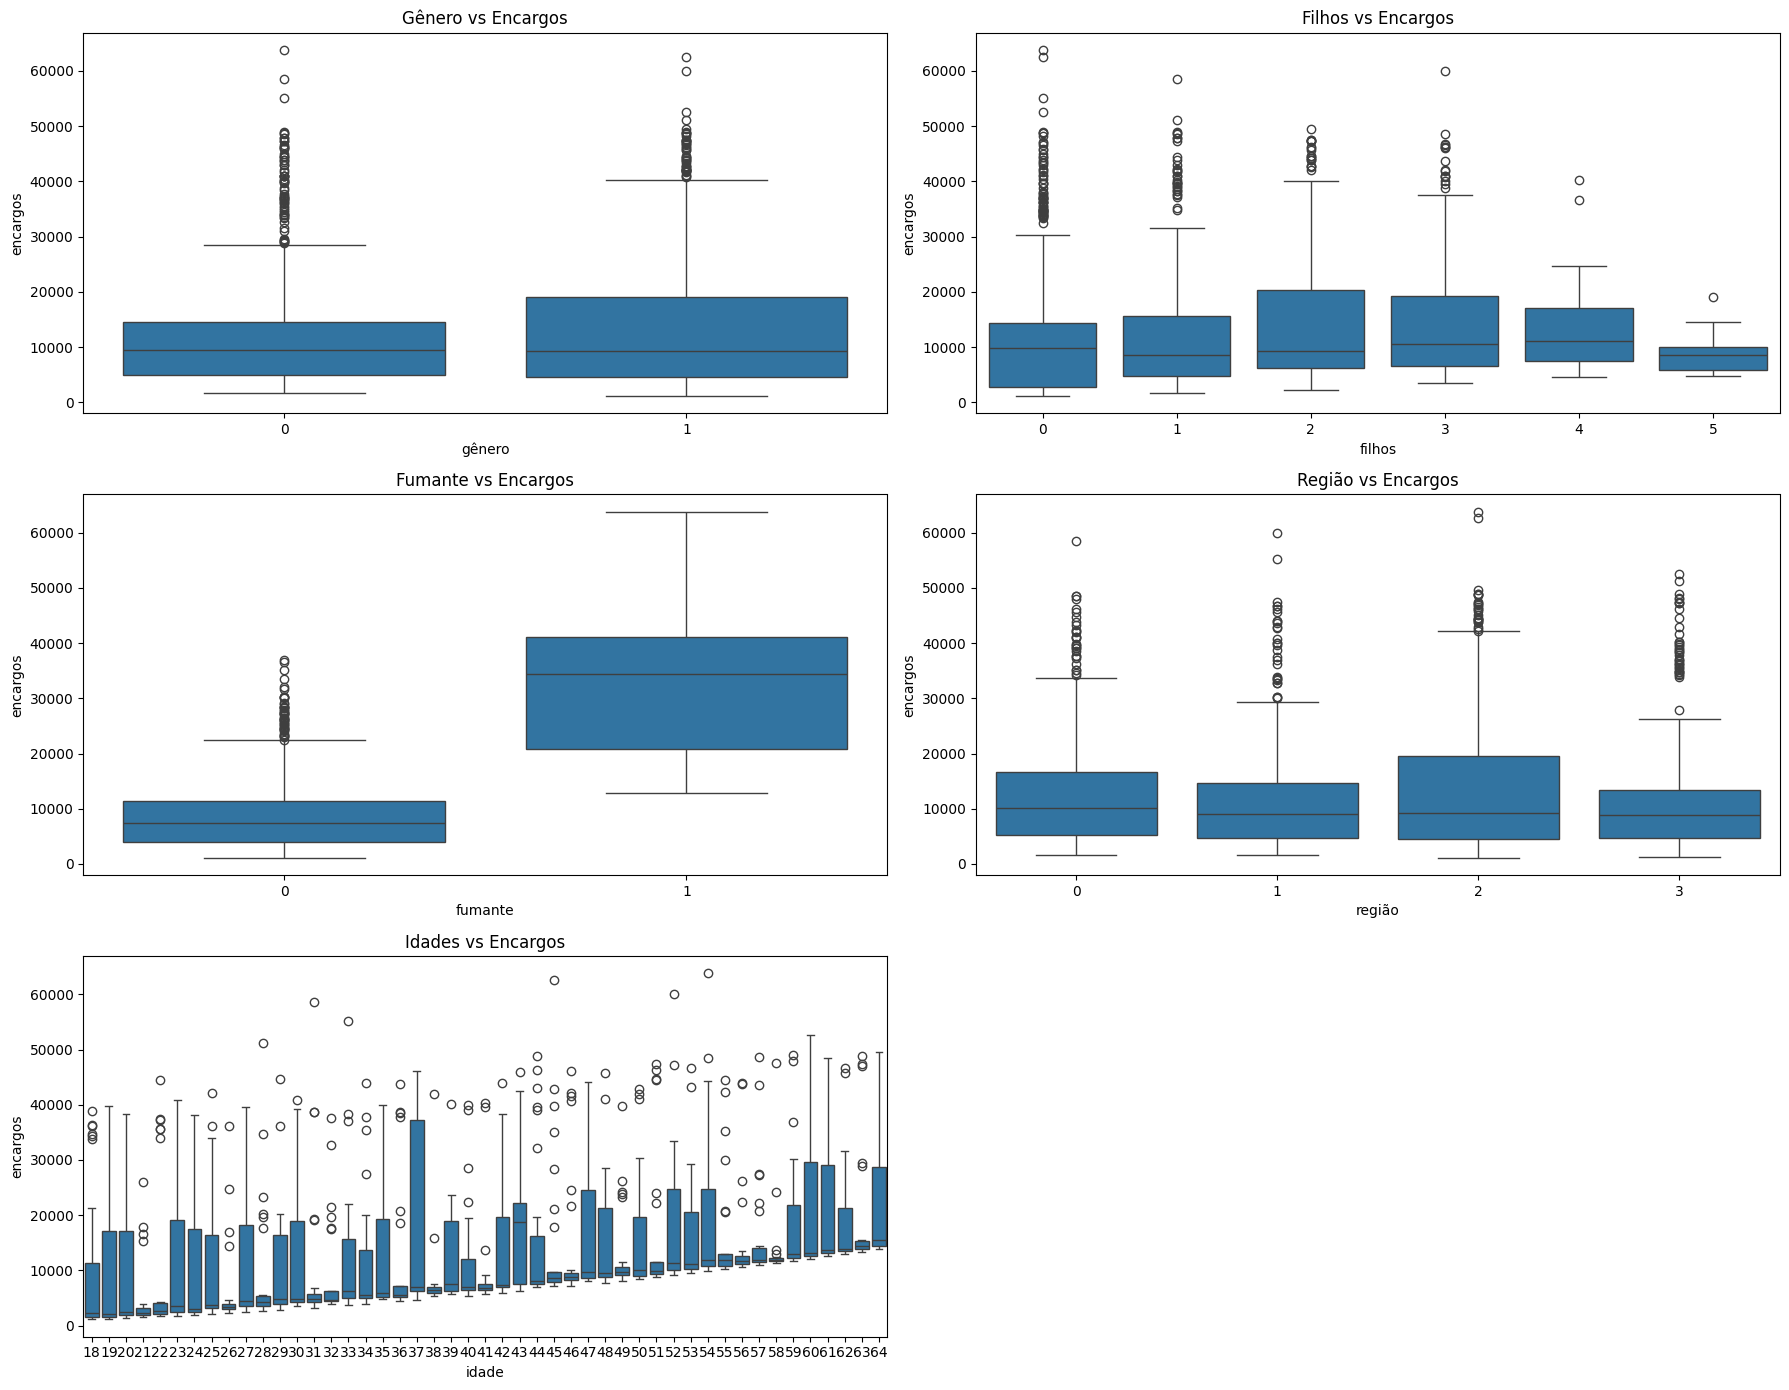

In [ ]:
# Gerando gráficos de análise exploratória das categorias

plt.figure(figsize=(18, 14))

# Gráfico de comparação entre gênero e encargos
plt.subplot(3, 2, 1)
sns.boxplot(x='gênero', y='encargos', data=df)
plt.title('Gênero vs Encargos')

# Gráfico de comparação entre número de filhos e encargos
plt.subplot(3, 2, 2)
sns.boxplot(x='filhos', y='encargos', data=df)
plt.title('Filhos vs Encargos')

# Gráfico de comparação entre fumante e encargos
plt.subplot(3, 2, 3)
sns.boxplot(x='fumante', y='encargos', data=df)
plt.title('Fumante vs Encargos')

# Gráfico de comparação entre região e encargos
plt.subplot(3, 2, 4)
sns.boxplot(x='região', y='encargos', data=df)
plt.title('Região vs Encargos')

# Gráfico de comparação entre idades e encargos
plt.subplot(3, 2, 5)
sns.boxplot(x='idade', y='encargos', data=df)
plt.title('Idades vs Encargos')

plt.tight_layout()
plt.show()


1. Encargos por Gênero: Observa-se que a mediana de custo para o gênero masculino é ligeiramente mais alta do que para o feminino, e a distribuição de custos para homens mostra uma variação maior, indicado pelos outliers acima do terceiro quartil.

2. Encargos por Fumante: Há uma diferença significativa de custos quando comparamos fumantes e não fumantes. Os fumantes têm uma mediana de custo substancialmente mais alta e uma distribuição de custos mais ampla, evidenciando o impacto deste hábito sobre os encargos de seguro de saúde.

3. Encargos por filho: Os custos tendem a aumentar com o número de filhos, mas não de forma linear. Segurados sem filhos e com cinco filhos apresentam os custos medianos mais baixos, enquanto aqueles com três filhos mostram a maior mediana.

4. Aumento de Encargos com a Idade: conforme a idade aumenta, os custos medianos tendem a subir. Fica bem aparente a partir dos 33 anos, onde as medianas e os quartis superiores aumentam significativamente.

5. Dispersão e Outliers: Há uma grande dispersão dos encargos em quase todas as idades, indicada pelos pontos que representam outliers e pelas caudas longas das caixas. Especialmente em idades mais avançadas, a variação dos encargos é mais acentuada, sugerindo uma diferenciação maior nos planos de saúde ou no uso de serviços médicos.

### Preparação dos dados

In [ ]:
# Transformando dados categoricos com LabelEncoder
colunas = ['gênero', 'filhos', 'fumante', 'região']

label_encoder = LabelEncoder()
for col in colunas:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


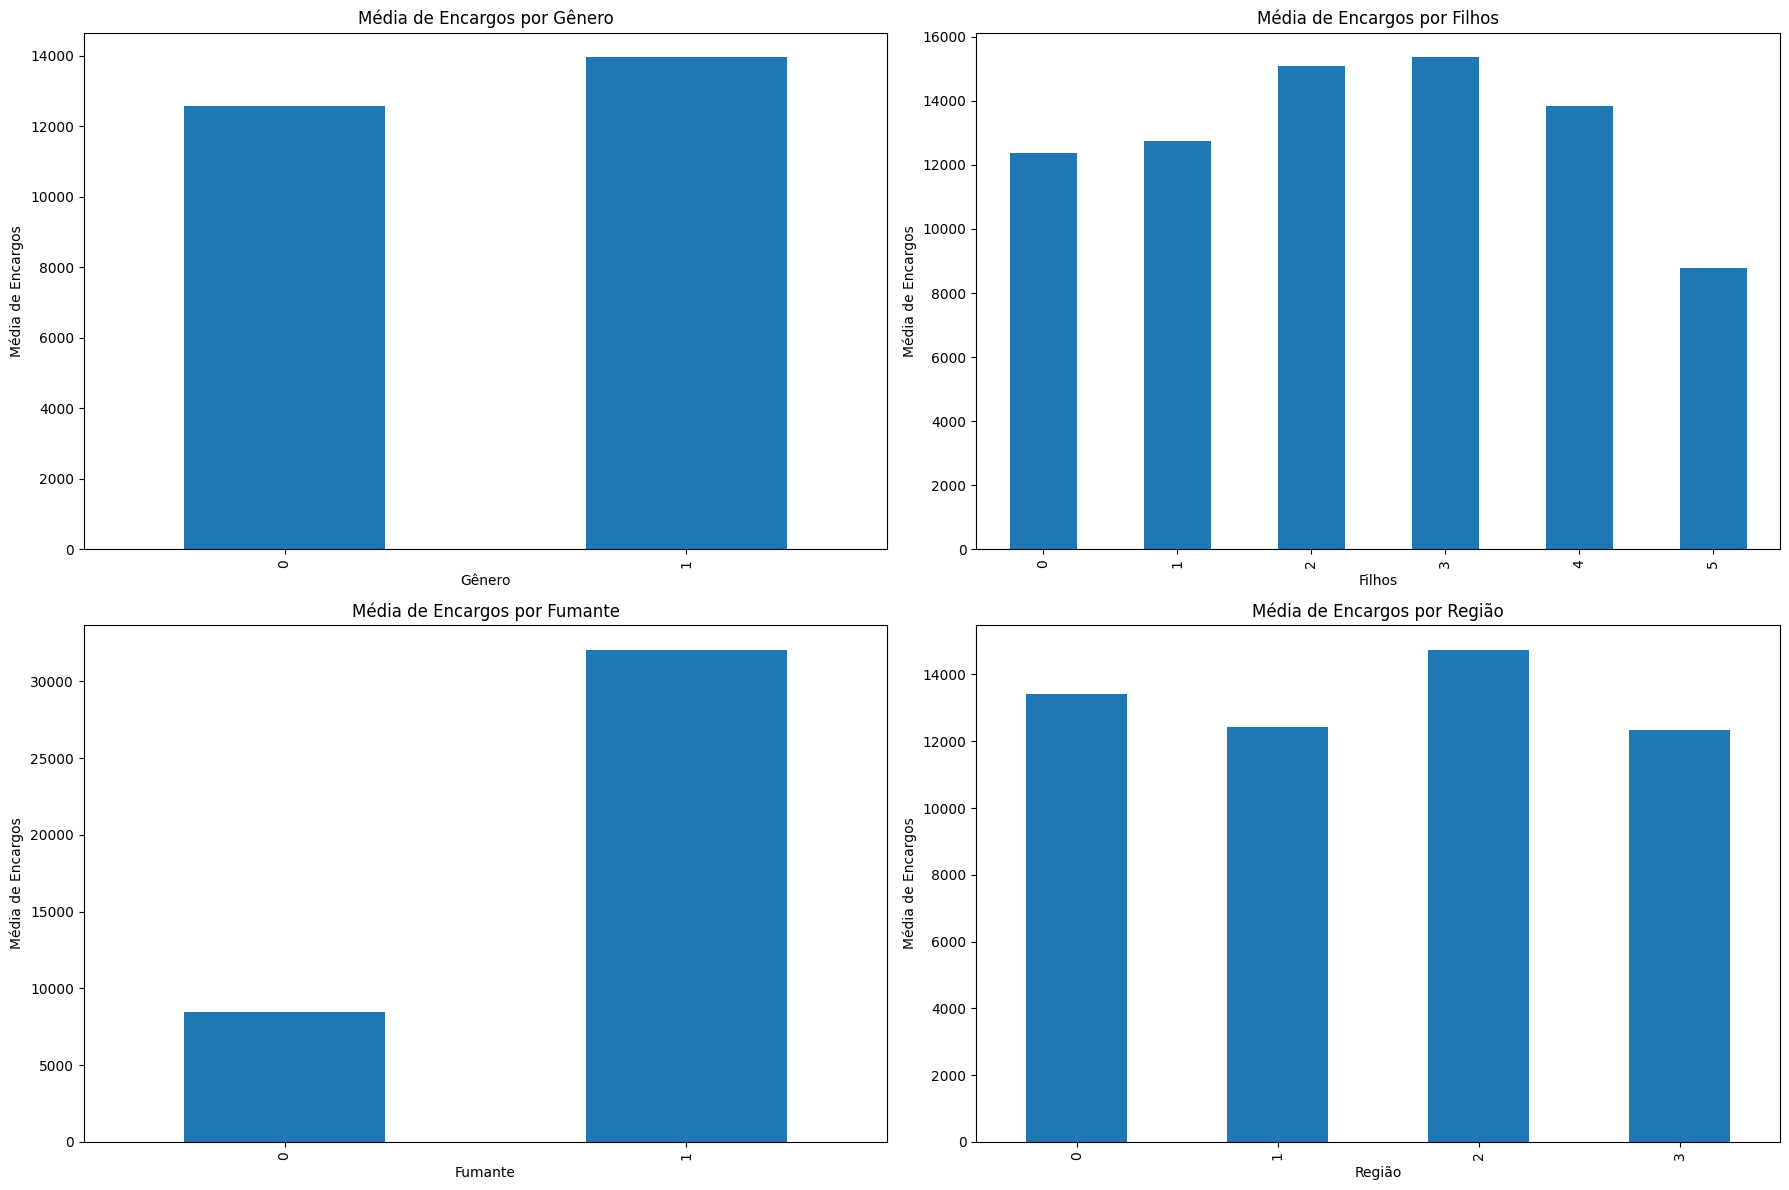

In [ ]:
# Gerando gráficos de barras individuais para cada categoria em relação aos encargos utilizando o novo dataset

colunas = ['gênero', 'filhos', 'fumante', 'região']


plt.figure(figsize=(18, 12))

for i, col in enumerate(colunas):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['encargos'].plot.bar()
    plt.title(f'Média de Encargos por {col.capitalize()}')
    plt.ylabel('Média de Encargos')
    plt.xlabel(col.capitalize())

plt.tight_layout()
plt.show()


1. as cobranças são mais altas para os homens em comparação com as mulheres, mas a diferença não é tão grande.
2. Os encargos com fumantes são cerca de três vezes maior do que com não fumantes.
3. Há uma pequena diferença de encargos por região.
4. Existe uma variação nos custos em relação ao número de filhos. Clientes sem filhos e com um filhos têm custos semelhantes, enquanto aqueles com dois e três filhos apresentam um aumento nos custos. Curiosamente, o custo diminui para clientes com quatro crianças e cai significativamente para clientes com cinco crianças. A hipotese é que possa ter descontos para famílias maiores ou sobre o tipo de cobertura oferecido a famílias maiores.


In [ ]:
df.corr()

,idade,gênero,imc,filhos,fumante,região,encargos
idade,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
gênero,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
imc,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
filhos,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
fumante,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
região,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
encargos,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


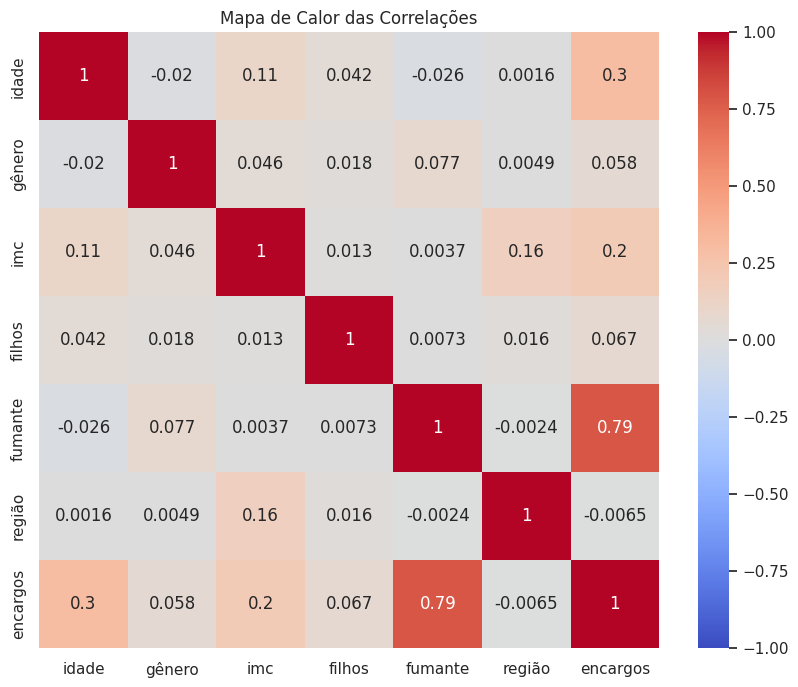

In [ ]:
# Gráfico de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor das Correlações')
plt.show()

1. Idade: Há uma correlação positiva moderada (0.298) entre idade e encargos, sugerindo que indivíduos mais velhos tendem a incorrer em encargos de seguro mais altos.

2. IMC: IMC tem uma correlação positiva mais baixa (0.198) com encargos. Embora não tão forte quanto a idade, um IMC mais alto pode
estar associado a encargos de seguro mais altos.

3. Filhos: O número de filhos tem uma correlação muito baixa com encargos.

4. Fumar: O instantâneo dos dados não inclui um valor de correlação para fumar, mas tipicamente é um fator significativo nos encargos de seguro.

5. Distribuição dos encargos: O custo mais elevado está associado à região sudoeste, seguido pela região sudeste. Nordeste e noroeste apresentam encargos menores em comparação com as outras duas regiões.

6. Análise Regional: A distribuição desigual dos encargos sugere variações regionais que podem ser devidas a diferenças nos preços dos serviços de saúde, prevalência de determinadas doenças, ou diferenças nos planos de saúde disponíveis.

## Desenvolvimento do Modelo
Aqui, vamos treinar diferentes modelos de Machine Learning e comparar seus desempenhos.

In [44]:
X=df.drop(['encargos'],axis=1)
Y=df[['encargos']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
cvscores=[]

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
print('Linear Regression')
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print({'treino': lrmodel.score(xtrain,ytrain)})
print({'teste': lrmodel.score(xtest,ytest)})
cvs = cross_val_score(lrmodel,X,Y,cv=5,).mean()
print({'cvs': cvs})

Linear Regression
{'treino': 0.7298127441752071}
{'teste': 0.8069852180198291}
{'cvs': 0.7472330007362453}


In [53]:
svrmodel=SVR()
print("SVR")
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print({'treino': r2_score(ytrain,ypredtrain1)})
print({'teste': r2_score(ytest,ypredtest1)})
cvs = cross_val_score(lrmodel,X,Y,cv=5,).mean()
print({'cvs': cvs})


SVR
{'treino': -0.10151504486543872}
{'teste': -0.13444618526543506}
{'cvs': 0.7472330007362453}


In [35]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print({'treino': r2_score(ytrain,ypredtrain2)})
print({'teste': r2_score(ytest,ypredtest2)})
cvs = cross_val_score(rfmodel,X,Y,cv=5,).mean()
print({'cvs': cvs})


estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
cvs = cross_val_score(rfmmodel,X,Y,cv=5,).mean()
cvscores.append(cvs)
print(cvs)


0.9735867068537906
0.8834744730239932
0.8349859197116537
{'n_estimators': 150}
0.9744660970911678
0.883375029659393
0.8359401171407352


In [36]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())


0.8943206659773493
0.9019489634515108
0.8554647740050048
{'learning_rate': 0.19, 'n_estimators': 19}
0.8682905827102738
0.9020430605837685
0.8603592415977535


In [37]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())


0.9947324715250472
0.8604747275960606
0.8026584021052837
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8691019035255965
0.9021274972897988
0.8610766072878195


## Salvando o Modelo Final
Após a avaliação, o melhor modelo será salvo para futuras previsões.

In [38]:
from pickle import dump

finalmodel = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)
finalmodel.fit(xtrain, ytrain)
dump(finalmodel, open('insurancemodelf.pkl', 'wb'))

## Previsão com Novos Dados
Agora, podemos prever os valores de seguro para novos dados.

In [40]:
new_data = pd.DataFrame({'idade': [19], 'gênero': [0], 'imc': [27.9], 'filho': [0], 'fumante': [1], 'região': [3]})
print(finalmodel.predict(new_data))

ValueError: feature_names mismatch: ['idade', 'gênero', 'imc', 'filhos', 'fumante', 'região'] ['idade', 'gênero', 'imc', 'filho', 'fumante', 'região']
expected filhos in input data
training data did not have the following fields: filho